# weCAN: A Cancer Survivability Predictor

## Modelling Iteration 2(Not in use)

#### Author: Rahim Kaba
#### Contact: rkaba91@gmail.com
#### Date: Sept-Dec 2023

In [2]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#load the data
df= pd.read_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_EDA_FeatureEngineer_test.csv', index_col=0)

In [4]:
#check out the data and the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Female Genital           25771 non-null  int64  
 9   Distant Mets: Head and Neck            25771 non-null  int64  
 10  Distant Mets: Intra-Abdominal          25771 no

In [5]:
#check out the first 5 rows of the data and the features

df.head()

,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Instable,Overall Survival Status: Living,Sample coverage,Sample Type (Metastasis),Sex (Female),TMB (nonsynonymous),Tumor Purity,Average Age,Anal Cancer,Appendiceal Cancer,Bladder Cancer,Breast Cancer,Cervical Cancer,Colorectal Cancer,Endometrial Cancer,Esophagogastric Cancer,Gastrointestinal Neuroendocrine Tumor,Gastrointestinal Stromal Tumor,Germ Cell Tumor,Head and Neck Cancer,Hepatobiliary Cancer,Melanoma,Mesothelioma,Non-Small Cell Lung Cancer,Ovarian Cancer,Pancreatic Cancer,Prostate Cancer,Renal Cell Carcinoma,Salivary Gland Cancer,"Skin Cancer, Non-Melanoma",Small Bowel Cancer,Small Cell Lung Cancer,Soft Tissue Sarcoma,Thyroid Cancer,Uterine Sarcoma,race_Asian-far east/indian subcont,race_Black or african american,race_Native american-am ind/alaska,race_Native hawaiian or pacific isl,race_Other,race_White,organ_Breast,organ_Core GI,organ_Developmental GI Tract,organ_Endocrine,organ_Genitourinary,organ_Gynecologic,organ_Head and Neck,organ_Skin,organ_Soft Tissue,organ_Thoracic,Year Group Encoded
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.2782,1,2,2,2.50,0,0,428,0,1,4.436621,50.0,39.1225,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
P-0000015-T01-IM3,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0.3503,1,8,8,2.55,0,0,281,1,1,7.764087,40.0,44.6775,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2
P-0000024-T01-IM3,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0.3878,1,8,5,0.72,0,0,1016,1,1,6.654932,40.0,61.5050,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3
P-0000025-T02-IM5,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0.1020,1,13,8,0.15,0,0,1147,1,1,1.957439,30.0,73.9075,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3
P-0000026-T01-IM3,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0.4196,1,11,7,1.23,0,1,1222,1,1,4.436621,10.0,72.5350,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4


In [6]:
#check out the last 5 rows of the data and the features
df.tail()

,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Instable,Overall Survival Status: Living,Sample coverage,Sample Type (Metastasis),Sex (Female),TMB (nonsynonymous),Tumor Purity,Average Age,Anal Cancer,Appendiceal Cancer,Bladder Cancer,Breast Cancer,Cervical Cancer,Colorectal Cancer,Endometrial Cancer,Esophagogastric Cancer,Gastrointestinal Neuroendocrine Tumor,Gastrointestinal Stromal Tumor,Germ Cell Tumor,Head and Neck Cancer,Hepatobiliary Cancer,Melanoma,Mesothelioma,Non-Small Cell Lung Cancer,Ovarian Cancer,Pancreatic Cancer,Prostate Cancer,Renal Cell Carcinoma,Salivary Gland Cancer,"Skin Cancer, Non-Melanoma",Small Bowel Cancer,Small Cell Lung Cancer,Soft Tissue Sarcoma,Thyroid Cancer,Uterine Sarcoma,race_Asian-far east/indian subcont,race_Black or african american,race_Native american-am ind/alaska,race_Native hawaiian or pacific isl,race_Other,race_White,organ_Breast,organ_Core GI,organ_Developmental GI Tract,organ_Endocrine,organ_Genitourinary,organ_Gynecologic,organ_Head and Neck,organ_Skin,organ_Soft Tissue,organ_Thoracic,Year Group Encoded
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0050559-T01-IM6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0027,1,1,1,0.00,0,1,836,0,0,12.105773,10.0,57.243333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
P-0050565-T01-IM6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6177,0,0,0,1.45,0,1,809,1,1,10.376377,20.0,70.292500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
P-0050566-T01-IM6,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.2359,1,4,4,0.55,0,1,633,0,1,9.511679,50.0,81.067500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
P-0050567-T01-IM6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1594,0,0,0,0.24,0,1,809,0,0,6.917585,30.0,43.516667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
P-0050568-T01-IM6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.3693,1,1,1,0.47,0,1,601,0,1,11.241075,40.0,76.273333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [7]:
df['Year Group Encoded'].value_counts().sort_index()

Year Group Encoded
1    7824
2    7938
3    7052
4    2957
Name: count, dtype: int64

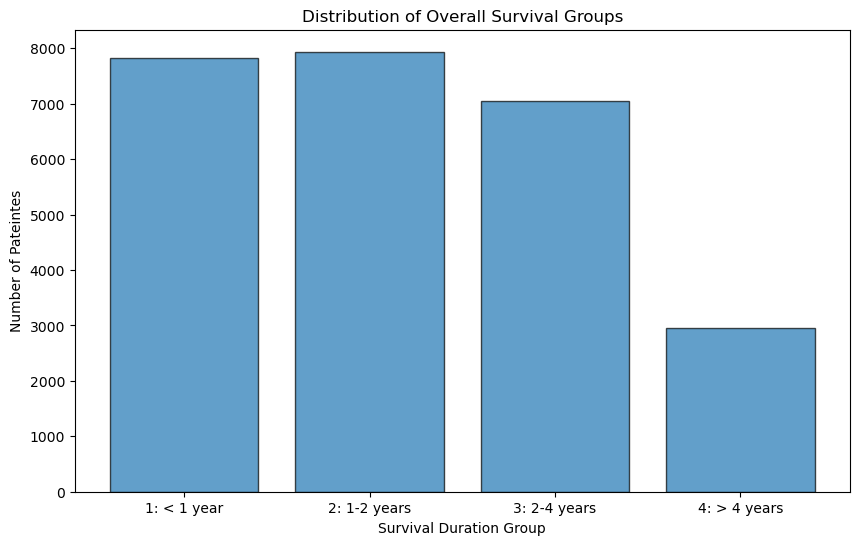

In [8]:
#check out target feature:

group_values = df['Year Group Encoded'].value_counts().sort_index()

#visualize
plt.figure(figsize=(10, 6))  
plt.bar(group_values.index, group_values.values, edgecolor='k', alpha=0.7) 
plt.title(f'Distribution of Overall Survival Groups') 
plt.xlabel('Survival Duration Group')
plt.xticks(group_values.index, ['1: < 1 year', '2: 1-2 years', '3: 2-4 years', '4: > 4 years'])
plt.ylabel('Number of Pateintes')
plt.show()  


In [9]:
#set X and y:

X = df.drop(columns=['Year Group Encoded'])
y = df['Year Group Encoded']

In [10]:
# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#split off a validation set for hyperparameter tuning from X_train_full and y_train_full

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [12]:
#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

Shape of: X_train_full:(20616, 77), X_train:(16492, 77), X_val:(4124, 77), X_test:(5155, 77)


In [13]:
#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [14]:
c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=c, random_state=42).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

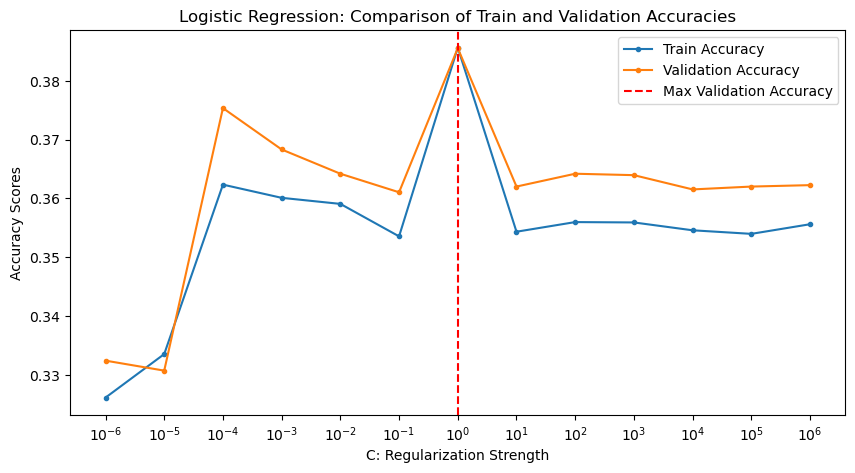

In [15]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression: Comparison of Train and Validation Accuracies')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = validation_accuracies.index(max(validation_accuracies))
C_value_val_test = c_values[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=C_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

---
Next I will do an initial multiclass logistic regression for classification into 1 of the 4 groups. I will use X_train and X_val for my first iteration of hyperparameter tuning of my log model.

For the initial multiclass logistic regression, I will us MNLogit from statsmodels so I can see the p-values of the coefficients of each feature for feature engineering/selection.

In [16]:
import statsmodels.api as sm

# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit()

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.157465
         Iterations: 35


LinAlgError: Singular matrix

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train_with_const is a pandas DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(len(X_train_with_const.columns))]

print(vif_data)

                                  feature        VIF
0                                   const   0.000000
1             Distant Mets: Adrenal Gland        inf
2             Distant Mets: Biliary tract        inf
3                Distant Mets: Bladder/UT        inf
4                      Distant Mets: Bone        inf
5                     Distant Mets: Bowel        inf
6                    Distant Mets: Breast        inf
7                 Distant Mets: CNS/Brain        inf
8                Distant Mets: Distant LN        inf
9            Distant Mets: Female Genital        inf
10            Distant Mets: Head and Neck        inf
11          Distant Mets: Intra-Abdominal        inf
12                   Distant Mets: Kidney        inf
13                    Distant Mets: Liver        inf
14                     Distant Mets: Lung        inf
15             Distant Mets: Male Genital        inf
16              Distant Mets: Mediastinum        inf
17                    Distant Mets: Ovary     

In [18]:
df2 = df.copy()

In [19]:
#drop reference for each dummy variable
cols_to_drop = ['Met Site Count', 'race_Other', 'organ_Breast', 'Anal Cancer', 'Distant Mets: Female Genital']

In [24]:
df2 = df2.drop(columns=cols_to_drop)

KeyError: "['Met Site Count', 'race_Other', 'organ_Breast', 'Anal Cancer', 'Distant Mets: Female Genital'] not found in axis"

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Head and Neck            25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal          25771 non-null  int64  
 10  Distant Mets: Kidney                   25771 no

Redo the train test split:

In [26]:
#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

In [27]:
# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
#split off a validation set for hyperparameter tuning from X_train_full and y_train_full

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [29]:
#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

Shape of: X_train_full:(20616, 72), X_train:(16492, 72), X_val:(4124, 72), X_test:(5155, 72)


In [30]:
#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [31]:
#check vif again:

# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Assuming X_train_with_const is a pandas DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(len(X_train_with_const.columns))]

print(vif_data)

                                  feature        VIF
0                                   const   0.000000
1             Distant Mets: Adrenal Gland   1.259287
2             Distant Mets: Biliary tract   1.391191
3                Distant Mets: Bladder/UT   1.442567
4                      Distant Mets: Bone   1.842455
5                     Distant Mets: Bowel   1.682194
6                    Distant Mets: Breast   1.088656
7                 Distant Mets: CNS/Brain   1.487595
8                Distant Mets: Distant LN   1.640252
9             Distant Mets: Head and Neck   1.137118
10          Distant Mets: Intra-Abdominal   1.884433
11                   Distant Mets: Kidney   1.172705
12                    Distant Mets: Liver   1.834231
13                     Distant Mets: Lung   1.923300
14             Distant Mets: Male Genital   1.253086
15              Distant Mets: Mediastinum   1.131959
16                    Distant Mets: Ovary   1.287334
17                   Distant Mets: Pleura   1.

In [32]:
cols_to_drop = df2.filter(like='organ_').columns
df2 = df2.drop(columns=cols_to_drop)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 64 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Head and Neck            25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal          25771 non-null  int64  
 10  Distant Mets: Kidney                   25771 no

In [34]:
#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

In [35]:
# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
#split off a validation set for hyperparameter tuning from X_train_full and y_train_full

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [37]:
#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

Shape of: X_train_full:(20616, 63), X_train:(16492, 63), X_val:(4124, 63), X_test:(5155, 63)


In [38]:
#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [39]:
#check vif again:

# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Assuming X_train_with_const is a pandas DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(len(X_train_with_const.columns))]

print(vif_data)

                                  feature         VIF
0                                   const  349.035893
1             Distant Mets: Adrenal Gland    1.259287
2             Distant Mets: Biliary tract    1.391191
3                Distant Mets: Bladder/UT    1.442567
4                      Distant Mets: Bone    1.842455
5                     Distant Mets: Bowel    1.682194
6                    Distant Mets: Breast    1.088656
7                 Distant Mets: CNS/Brain    1.487595
8                Distant Mets: Distant LN    1.640252
9             Distant Mets: Head and Neck    1.137118
10          Distant Mets: Intra-Abdominal    1.884433
11                   Distant Mets: Kidney    1.172705
12                    Distant Mets: Liver    1.834231
13                     Distant Mets: Lung    1.923300
14             Distant Mets: Male Genital    1.253086
15              Distant Mets: Mediastinum    1.131959
16                    Distant Mets: Ovary    1.287334
17                   Distant

There are still some features with high VIF scores but no more with inf. We can try to model and see how this performs.

In [40]:
# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.157903
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16300
Method:                           MLE   Df Model:                          189
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.1279
Time:                        21:23:44   Log-Likelihood:                -19096.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2586      0.362     -3.476      0.001      -1.968      -0.549
Distant Mets: Adrenal Gland              -0.5227  

In [38]:
print(mnlogit_result.mle_retvals)

{'fopt': 1.1579030431434123, 'iterations': 35, 'score': array([ 5.40032082e-17,  7.53971494e-19,  7.28390318e-18,  5.54707599e-18,
        1.31945011e-17,  1.35714869e-17,  4.20743021e-19,  7.45893228e-18,
        1.73278806e-17,  7.57337438e-19,  1.84723016e-17,  3.60829215e-18,
        1.49044008e-17,  1.70989964e-17,  1.91185629e-18,  2.06332378e-18,
        4.49690141e-18,  7.51278738e-18,  2.16766804e-18,  2.84085688e-18,
        3.97854601e-17,  1.13108346e-17,  5.53630497e-17,  2.51718769e-16,
        6.73188834e-17,  5.12969891e-18,  3.64801029e-17,  3.28955609e-14,
        2.39385949e-17,  2.86509168e-17,  4.22224037e-16,  2.10078000e-15,
        3.41398292e-15,  1.18481235e-18,  2.63553428e-18,  2.57158134e-18,
        1.56179809e-18,  7.72820781e-18,  1.32618200e-18,  1.76375474e-18,
        2.35616092e-19,  5.48648900e-19,  9.86221641e-19,  7.27043940e-19,
        6.86652610e-19,  2.58504512e-18,  4.54402463e-19,  8.76491862e-18,
        4.48343763e-18,  3.23803829e-18,  4.

Drop the feature with highest p value: `race_Native hawaiian or pacific isl` 1.00. Refit the log regression.

In [39]:
#drop
df2 = df2.drop(columns = 'race_Native hawaiian or pacific isl')

In [40]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 63 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Head and Neck            25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal          25771 non-null  int64  
 10  Distant Mets: Kidney                   25771 no

In [41]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 62), X_train:(16492, 62), X_val:(4124, 62), X_test:(5155, 62)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [42]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.157973
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16303
Method:                           MLE   Df Model:                          186
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1278
Time:                        15:43:06   Log-Likelihood:                -19097.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2518      0.362     -3.458      0.001      -1.961      -0.542
Distant Mets: Adrenal Gland              -0.5231  

Drop feature with the highest p value: `Small Bowel Cancer` = 0.998

In [43]:
#drop
df2 = df2.drop(columns = 'Small Bowel Cancer')

In [44]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Head and Neck            25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal          25771 non-null  int64  
 10  Distant Mets: Kidney                   25771 no

In [45]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 61), X_train:(16492, 61), X_val:(4124, 61), X_test:(5155, 61)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [46]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.157998
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16306
Method:                           MLE   Df Model:                          183
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1278
Time:                        15:43:08   Log-Likelihood:                -19098.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4138      0.273     -5.179      0.000      -1.949      -0.879
Distant Mets: Adrenal Gland              -0.5230  

Drop feature with the highest p value: `Mesothelioma` = 0.997

In [47]:
#drop
df2 = df2.drop(columns = 'Mesothelioma')

In [48]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distant Mets: Adrenal Gland            25771 non-null  int64  
 1   Distant Mets: Biliary tract            25771 non-null  int64  
 2   Distant Mets: Bladder/UT               25771 non-null  int64  
 3   Distant Mets: Bone                     25771 non-null  int64  
 4   Distant Mets: Bowel                    25771 non-null  int64  
 5   Distant Mets: Breast                   25771 non-null  int64  
 6   Distant Mets: CNS/Brain                25771 non-null  int64  
 7   Distant Mets: Distant LN               25771 non-null  int64  
 8   Distant Mets: Head and Neck            25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal          25771 non-null  int64  
 10  Distant Mets: Kidney                   25771 no

In [49]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 60), X_train:(16492, 60), X_val:(4124, 60), X_test:(5155, 60)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [50]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.158081
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16309
Method:                           MLE   Df Model:                          180
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1278
Time:                        15:43:10   Log-Likelihood:                -19099.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2731      0.218     -5.850      0.000      -1.700      -0.847
Distant Mets: Adrenal Gland              -0.5218  

Drop the feature with the highest p value: `Gastrointestinal Neuroendocrine Tumor` = 0.997

In [51]:
#drop
df2 = df2.drop(columns = 'Gastrointestinal Neuroendocrine Tumor')

In [52]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [53]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 59), X_train:(16492, 59), X_val:(4124, 59), X_test:(5155, 59)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [54]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.158147
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16312
Method:                           MLE   Df Model:                          177
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1277
Time:                        15:43:12   Log-Likelihood:                -19100.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2730      0.206     -6.165      0.000      -1.678      -0.868
Distant Mets: Adrenal Gland           -0.5219      0.089   

Drop feature with the highest p value: `MSI Score` = 0.999

In [55]:
#drop
df2 = df2.drop(columns = 'MSI Score')

In [56]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [57]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 58), X_train:(16492, 58), X_val:(4124, 58), X_test:(5155, 58)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [58]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.158929
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16315
Method:                           MLE   Df Model:                          174
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1271
Time:                        15:43:14   Log-Likelihood:                -19113.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2664      0.206     -6.135      0.000      -1.671      -0.862
Distant Mets: Adrenal Gland           -0.5225      0.089   

Drop column with the highest p value: `Renal Cell Carcinoma` = 0.949


In [59]:
#drop
df2 = df2.drop(columns = 'Renal Cell Carcinoma')

In [60]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 58 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [61]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 57), X_train:(16492, 57), X_val:(4124, 57), X_test:(5155, 57)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [62]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

         Current function value: 1.159408
         Iterations: 35


/Users/RahimKaba/anaconda3/envs/plotly_bokeh2/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16318
Method:                           MLE   Df Model:                          171
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1268
Time:                        15:43:16   Log-Likelihood:                -19121.
converged:                      False   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2709      0.193     -6.589      0.000      -1.649      -0.893
Distant Mets: Adrenal Gland           -0.5232      0.089   

Drop the column with the highest p value: `Cervical Cancer` = 0.999

In [63]:
#drop
df2 = df2.drop(columns = 'Cervical Cancer')

In [64]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [65]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 56), X_train:(16492, 56), X_val:(4124, 56), X_test:(5155, 56)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [66]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.160191
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16321
Method:                           MLE   Df Model:                          168
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1262
Time:                        15:43:17   Log-Likelihood:                -19134.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2833      0.188    

Drop the feature with the highest p value: `Melanoma` = 0.996 

In [67]:
#drop
df2 = df2.drop(columns = 'Melanoma')

In [68]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [69]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 55), X_train:(16492, 55), X_val:(4124, 55), X_test:(5155, 55)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [70]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.160510
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16324
Method:                           MLE   Df Model:                          165
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1259
Time:                        15:43:18   Log-Likelihood:                -19139.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2238      0.180    

Drop the feature with the highest p value: `Breast Cancer` = 0.939

In [71]:
#drop
df2 = df2.drop(columns = 'Breast Cancer')

In [72]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [73]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 54), X_train:(16492, 54), X_val:(4124, 54), X_test:(5155, 54)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [74]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.167185
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16327
Method:                           MLE   Df Model:                          162
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1209
Time:                        15:43:19   Log-Likelihood:                -19249.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2178      0.174    

Drop the feature with the highest p value: `Average Age` = 0.993

In [75]:
#drop
df2 = df2.drop(columns = 'Average Age')

In [76]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [77]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 53), X_train:(16492, 53), X_val:(4124, 53), X_test:(5155, 53)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [78]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.167246
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16330
Method:                           MLE   Df Model:                          159
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1209
Time:                        15:43:19   Log-Likelihood:                -19250.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.1303      0.136    

Drop the feature with the highest p value: `Skin Cancer, Non-Melanoma` = 0.966

In [79]:
#drop
df2 = df2.drop(columns = 'Skin Cancer, Non-Melanoma')

In [80]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [81]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 52), X_train:(16492, 52), X_val:(4124, 52), X_test:(5155, 52)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [82]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.167262
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16333
Method:                           MLE   Df Model:                          156
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1208
Time:                        15:43:20   Log-Likelihood:                -19250.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.1384      0.136    

Drop the feature with the highest p value: `Thyroid Cancer` = 0.897 

In [83]:
#drop
df2 = df2.drop(columns = 'Thyroid Cancer')

In [84]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Distant LN            25771 non-null  int64  
 8   Distant Mets: Head and Neck         25771 non-null  int64  
 9   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 10  Distant Mets: Kidney                25771 non-null  int64  
 11  Distant Mets: Live

In [85]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 51), X_train:(16492, 51), X_val:(4124, 51), X_test:(5155, 51)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [86]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.168306
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16336
Method:                           MLE   Df Model:                          153
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1201
Time:                        15:43:21   Log-Likelihood:                -19268.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0699      0.135    

Drop the feature with the highest p value `Distant Mets: Distant LN` = 0.984

In [87]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Distant LN')

In [88]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Head and Neck         25771 non-null  int64  
 8   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 9   Distant Mets: Kidney                25771 non-null  int64  
 10  Distant Mets: Liver                 25771 non-null  int64  
 11  Distant Mets: Lung

In [89]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 50), X_train:(16492, 50), X_val:(4124, 50), X_test:(5155, 50)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [90]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.168672
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16339
Method:                           MLE   Df Model:                          150
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1198
Time:                        15:43:22   Log-Likelihood:                -19274.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0706      0.135    

Drop the feature with the highest p-value: `Small Cell Lung Cancer` = 0.915

In [91]:
#drop
df2 = df2.drop(columns = 'Small Cell Lung Cancer')

In [92]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Head and Neck         25771 non-null  int64  
 8   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 9   Distant Mets: Kidney                25771 non-null  int64  
 10  Distant Mets: Liver                 25771 non-null  int64  
 11  Distant Mets: Lung

In [93]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 49), X_train:(16492, 49), X_val:(4124, 49), X_test:(5155, 49)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [94]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.169975
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16342
Method:                           MLE   Df Model:                          147
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1188
Time:                        15:43:23   Log-Likelihood:                -19295.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0705      0.134    

Drop the feature with the highest p value: `Non-Small Cell Lung Cancer` = 0.995

In [95]:
#drop
df2 = df2.drop(columns = 'Non-Small Cell Lung Cancer')

In [96]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Head and Neck         25771 non-null  int64  
 8   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 9   Distant Mets: Kidney                25771 non-null  int64  
 10  Distant Mets: Liver                 25771 non-null  int64  
 11  Distant Mets: Lung

In [97]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 48), X_train:(16492, 48), X_val:(4124, 48), X_test:(5155, 48)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [98]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.170904
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16345
Method:                           MLE   Df Model:                          144
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1181
Time:                        15:43:23   Log-Likelihood:                -19311.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9972      0.128    

Drop the feature with the highest p value: `Colorectal Cancer` = 0.974

In [99]:
#drop
df2 = df2.drop(columns = 'Colorectal Cancer')

In [100]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Head and Neck         25771 non-null  int64  
 8   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 9   Distant Mets: Kidney                25771 non-null  int64  
 10  Distant Mets: Liver                 25771 non-null  int64  
 11  Distant Mets: Lung

In [101]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 47), X_train:(16492, 47), X_val:(4124, 47), X_test:(5155, 47)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [102]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.173630
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16348
Method:                           MLE   Df Model:                          141
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1160
Time:                        15:43:24   Log-Likelihood:                -19356.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9936      0.126    

Drop the feature with the highest p value: `Prostate Cancer` = 0.999

In [103]:
#drop
df2 = df2.drop(columns = 'Prostate Cancer')

In [104]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: Breast                25771 non-null  int64  
 6   Distant Mets: CNS/Brain             25771 non-null  int64  
 7   Distant Mets: Head and Neck         25771 non-null  int64  
 8   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 9   Distant Mets: Kidney                25771 non-null  int64  
 10  Distant Mets: Liver                 25771 non-null  int64  
 11  Distant Mets: Lung

In [105]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 46), X_train:(16492, 46), X_val:(4124, 46), X_test:(5155, 46)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [106]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.173847
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16351
Method:                           MLE   Df Model:                          138
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1159
Time:                        15:43:25   Log-Likelihood:                -19359.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9955      0.124    

Drop the feature with the highest p value: `Distant Mets: Breast` = 0.943

In [107]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Breast')

In [108]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: CNS/Brain             25771 non-null  int64  
 6   Distant Mets: Head and Neck         25771 non-null  int64  
 7   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 8   Distant Mets: Kidney                25771 non-null  int64  
 9   Distant Mets: Liver                 25771 non-null  int64  
 10  Distant Mets: Lung                  25771 non-null  int64  
 11  Distant Mets: Male

In [109]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 45), X_train:(16492, 45), X_val:(4124, 45), X_test:(5155, 45)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [110]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.174094
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16354
Method:                           MLE   Df Model:                          135
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1157
Time:                        15:43:25   Log-Likelihood:                -19363.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9946      0.124    

Drop the feature with the highest p value: `Tumor Purity` = 0.873

In [111]:
#drop
df2 = df2.drop(columns = 'Tumor Purity')

In [112]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Biliary tract         25771 non-null  int64  
 2   Distant Mets: Bladder/UT            25771 non-null  int64  
 3   Distant Mets: Bone                  25771 non-null  int64  
 4   Distant Mets: Bowel                 25771 non-null  int64  
 5   Distant Mets: CNS/Brain             25771 non-null  int64  
 6   Distant Mets: Head and Neck         25771 non-null  int64  
 7   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 8   Distant Mets: Kidney                25771 non-null  int64  
 9   Distant Mets: Liver                 25771 non-null  int64  
 10  Distant Mets: Lung                  25771 non-null  int64  
 11  Distant Mets: Male

In [113]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 44), X_train:(16492, 44), X_val:(4124, 44), X_test:(5155, 44)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [114]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.176474
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16357
Method:                           MLE   Df Model:                          132
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1139
Time:                        15:43:26   Log-Likelihood:                -19402.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0259      0.119    

Drop the feature with the highest p value: `Distant Mets: Biliary tract` = 0.865

In [115]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Biliary tract')

In [116]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: Bowel                 25771 non-null  int64  
 4   Distant Mets: CNS/Brain             25771 non-null  int64  
 5   Distant Mets: Head and Neck         25771 non-null  int64  
 6   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 7   Distant Mets: Kidney                25771 non-null  int64  
 8   Distant Mets: Liver                 25771 non-null  int64  
 9   Distant Mets: Lung                  25771 non-null  int64  
 10  Distant Mets: Male Genital          25771 non-null  int64  
 11  Distant Mets: Medi

In [117]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 43), X_train:(16492, 43), X_val:(4124, 43), X_test:(5155, 43)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [118]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.177062
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16360
Method:                           MLE   Df Model:                          129
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1135
Time:                        15:43:27   Log-Likelihood:                -19412.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0272      0.119    

Drop feature with the highes p value `TMB (nonsynonymous)` = 0.845

In [119]:
#drop
df2 = df2.drop(columns = 'TMB (nonsynonymous)')

In [120]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: Bowel                 25771 non-null  int64  
 4   Distant Mets: CNS/Brain             25771 non-null  int64  
 5   Distant Mets: Head and Neck         25771 non-null  int64  
 6   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 7   Distant Mets: Kidney                25771 non-null  int64  
 8   Distant Mets: Liver                 25771 non-null  int64  
 9   Distant Mets: Lung                  25771 non-null  int64  
 10  Distant Mets: Male Genital          25771 non-null  int64  
 11  Distant Mets: Medi

In [121]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 42), X_train:(16492, 42), X_val:(4124, 42), X_test:(5155, 42)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [122]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.177458
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16363
Method:                           MLE   Df Model:                          126
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1132
Time:                        15:43:28   Log-Likelihood:                -19419.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0152      0.119    

Drop the feature with the highest p value: `Gastrointestinal Stromal Tumor` = 0.840

In [123]:
#drop
df2 = df2.drop(columns = 'Gastrointestinal Stromal Tumor')

In [124]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: Bowel                 25771 non-null  int64  
 4   Distant Mets: CNS/Brain             25771 non-null  int64  
 5   Distant Mets: Head and Neck         25771 non-null  int64  
 6   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 7   Distant Mets: Kidney                25771 non-null  int64  
 8   Distant Mets: Liver                 25771 non-null  int64  
 9   Distant Mets: Lung                  25771 non-null  int64  
 10  Distant Mets: Male Genital          25771 non-null  int64  
 11  Distant Mets: Medi

In [125]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 41), X_train:(16492, 41), X_val:(4124, 41), X_test:(5155, 41)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [126]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.177558
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16366
Method:                           MLE   Df Model:                          123
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1131
Time:                        15:43:28   Log-Likelihood:                -19420.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0146      0.119    

Drop the feature with the highest p value: `Esophagogastric Cancer` = 0.829

In [127]:
#drop
df2 = df2.drop(columns = 'Esophagogastric Cancer')

In [128]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: Bowel                 25771 non-null  int64  
 4   Distant Mets: CNS/Brain             25771 non-null  int64  
 5   Distant Mets: Head and Neck         25771 non-null  int64  
 6   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 7   Distant Mets: Kidney                25771 non-null  int64  
 8   Distant Mets: Liver                 25771 non-null  int64  
 9   Distant Mets: Lung                  25771 non-null  int64  
 10  Distant Mets: Male Genital          25771 non-null  int64  
 11  Distant Mets: Medi

In [129]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 40), X_train:(16492, 40), X_val:(4124, 40), X_test:(5155, 40)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [130]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.178519
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16369
Method:                           MLE   Df Model:                          120
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1124
Time:                        15:43:29   Log-Likelihood:                -19436.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0139      0.118    

Drop the feature with the highest p value: `Uterine Sarcoma` = 0.805

In [131]:
#drop
df2 = df2.drop(columns = 'Uterine Sarcoma')

In [132]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: Bowel                 25771 non-null  int64  
 4   Distant Mets: CNS/Brain             25771 non-null  int64  
 5   Distant Mets: Head and Neck         25771 non-null  int64  
 6   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 7   Distant Mets: Kidney                25771 non-null  int64  
 8   Distant Mets: Liver                 25771 non-null  int64  
 9   Distant Mets: Lung                  25771 non-null  int64  
 10  Distant Mets: Male Genital          25771 non-null  int64  
 11  Distant Mets: Medi

In [133]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 39), X_train:(16492, 39), X_val:(4124, 39), X_test:(5155, 39)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [134]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.178699
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16372
Method:                           MLE   Df Model:                          117
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1122
Time:                        15:43:30   Log-Likelihood:                -19439.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0141      0.118    

Drop the feature with the highest p value: `Distant Mets: Bowel` = 0.756 

In [135]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Bowel')

In [136]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Male Genital          25771 non-null  int64  
 10  Distant Mets: Mediastinum           25771 non-null  int64  
 11  Distant Mets: Ovar

In [137]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 38), X_train:(16492, 38), X_val:(4124, 38), X_test:(5155, 38)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [138]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.179634
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16375
Method:                           MLE   Df Model:                          114
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1115
Time:                        15:43:30   Log-Likelihood:                -19455.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0163      0.118    

Drop the feature with the highest p value: `Appendiceal Cancer` = 0.769

In [139]:
#drop
df2 = df2.drop(columns = 'Appendiceal Cancer')

In [140]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Male Genital          25771 non-null  int64  
 10  Distant Mets: Mediastinum           25771 non-null  int64  
 11  Distant Mets: Ovar

In [141]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 37), X_train:(16492, 37), X_val:(4124, 37), X_test:(5155, 37)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [142]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.179844
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16378
Method:                           MLE   Df Model:                          111
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1114
Time:                        15:43:31   Log-Likelihood:                -19458.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0207      0.118    

Drop the feature with the highest p value: `Distant Mets: Male Genital` = 0.776

In [143]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Male Genital')

In [144]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [145]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 36), X_train:(16492, 36), X_val:(4124, 36), X_test:(5155, 36)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [146]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.179923
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16381
Method:                           MLE   Df Model:                          108
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1113
Time:                        15:43:32   Log-Likelihood:                -19459.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0226      0.118    

Drop the feature with the highest p value: `Salivary Gland Cancer` = 0.666

In [147]:
#drop
df2 = df2.drop(columns = 'Salivary Gland Cancer')

In [148]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [149]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 35), X_train:(16492, 35), X_val:(4124, 35), X_test:(5155, 35)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [150]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.180016
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16384
Method:                           MLE   Df Model:                          105
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1112
Time:                        15:43:32   Log-Likelihood:                -19461.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0247      0.118    

Drop the feature with the highest p value: `Bladder Cancer` = 0.658

In [151]:
#drop
df2 = df2.drop(columns = 'Bladder Cancer')

In [152]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [153]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 34), X_train:(16492, 34), X_val:(4124, 34), X_test:(5155, 34)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [154]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.181645
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16387
Method:                           MLE   Df Model:                          102
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1100
Time:                        15:43:33   Log-Likelihood:                -19488.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0288      0.118    

Drop the feature with the highest p value: `Sex (Female)` = 0.621

In [155]:
#drop
df2 = df2.drop(columns = 'Sex (Female)')

In [156]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [157]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 33), X_train:(16492, 33), X_val:(4124, 33), X_test:(5155, 33)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [158]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.183374
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16390
Method:                           MLE   Df Model:                           99
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1087
Time:                        15:43:34   Log-Likelihood:                -19516.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.0363      0.116    

Drop the feature with the highest p value: `Metastatic patient` = 0.336

In [159]:
#drop
df2 = df2.drop(columns = 'Metastatic patient')

In [160]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [161]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 32), X_train:(16492, 32), X_val:(4124, 32), X_test:(5155, 32)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [162]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.183559
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16393
Method:                           MLE   Df Model:                           96
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1086
Time:                        15:43:34   Log-Likelihood:                -19519.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9801      0.111    

Drop feature with the highest p value: `Ovarian Cancer` = 0.326

In [163]:
#drop
df2 = df2.drop(columns = 'Ovarian Cancer')

In [164]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [165]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 31), X_train:(16492, 31), X_val:(4124, 31), X_test:(5155, 31)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [166]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.186475
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16396
Method:                           MLE   Df Model:                           93
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1064
Time:                        15:43:35   Log-Likelihood:                -19567.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9808      0.111    

Drop feature with the highest p value: `Soft Tissue Sarcoma` = 0.379

In [167]:
#drop
df2 = df2.drop(columns = 'Soft Tissue Sarcoma')

In [168]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [169]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 30), X_train:(16492, 30), X_val:(4124, 30), X_test:(5155, 30)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [170]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.186667
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16399
Method:                           MLE   Df Model:                           90
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1062
Time:                        15:43:35   Log-Likelihood:                -19571.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9843      0.111    

Drop the feature with the highest p value: `Distant Mets: Unspecified` = 0.755           

In [171]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Unspecified')

In [172]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [173]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 29), X_train:(16492, 29), X_val:(4124, 29), X_test:(5155, 29)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [174]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.187861
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16402
Method:                           MLE   Df Model:                           87
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1053
Time:                        15:43:36   Log-Likelihood:                -19590.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9135      0.110    

Drop the feature with the highest p value: `Endometrial Cancer` = 0.425

In [175]:
#drop
df2 = df2.drop(columns = 'Endometrial Cancer')

In [176]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [177]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 28), X_train:(16492, 28), X_val:(4124, 28), X_test:(5155, 28)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [178]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.190040
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16405
Method:                           MLE   Df Model:                           84
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1037
Time:                        15:43:37   Log-Likelihood:                -19626.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9056      0.109    

Drop feature with the highest p value: `Germ Cell Tumor` = 0.347

In [179]:
#drop
df2 = df2.drop(columns = 'Germ Cell Tumor')

In [180]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [181]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 27), X_train:(16492, 27), X_val:(4124, 27), X_test:(5155, 27)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [182]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.192107
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16408
Method:                           MLE   Df Model:                           81
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1021
Time:                        15:43:37   Log-Likelihood:                -19660.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9280      0.109    

Drop feature with the highest p value: `race_Native american-am ind/alaska` = 0.256

In [183]:
#drop
df2 = df2.drop(columns = 'race_Native american-am ind/alaska')

In [184]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Distant Mets: Adrenal Gland         25771 non-null  int64  
 1   Distant Mets: Bladder/UT            25771 non-null  int64  
 2   Distant Mets: Bone                  25771 non-null  int64  
 3   Distant Mets: CNS/Brain             25771 non-null  int64  
 4   Distant Mets: Head and Neck         25771 non-null  int64  
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64  
 6   Distant Mets: Kidney                25771 non-null  int64  
 7   Distant Mets: Liver                 25771 non-null  int64  
 8   Distant Mets: Lung                  25771 non-null  int64  
 9   Distant Mets: Mediastinum           25771 non-null  int64  
 10  Distant Mets: Ovary                 25771 non-null  int64  
 11  Distant Mets: Pleu

In [185]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 26), X_train:(16492, 26), X_val:(4124, 26), X_test:(5155, 26)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [186]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.192228
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16411
Method:                           MLE   Df Model:                           78
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1020
Time:                        15:43:38   Log-Likelihood:                -19662.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9179      0.109    

Drop feature with the highest p value: `Fraction Genome Altered` = 0.239

In [187]:
#drop
df2 = df2.drop(columns = 'Fraction Genome Altered')

In [188]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Distant Mets: Adrenal Gland         25771 non-null  int64
 1   Distant Mets: Bladder/UT            25771 non-null  int64
 2   Distant Mets: Bone                  25771 non-null  int64
 3   Distant Mets: CNS/Brain             25771 non-null  int64
 4   Distant Mets: Head and Neck         25771 non-null  int64
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64
 6   Distant Mets: Kidney                25771 non-null  int64
 7   Distant Mets: Liver                 25771 non-null  int64
 8   Distant Mets: Lung                  25771 non-null  int64
 9   Distant Mets: Mediastinum           25771 non-null  int64
 10  Distant Mets: Ovary                 25771 non-null  int64
 11  Distant Mets: Pleura                25771 no

In [189]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 25), X_train:(16492, 25), X_val:(4124, 25), X_test:(5155, 25)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [190]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.193411
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16414
Method:                           MLE   Df Model:                           75
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1011
Time:                        15:43:38   Log-Likelihood:                -19682.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9393      0.108    

Drop feature with the highest p value: `Distant Mets: PNS` = 0.201

In [191]:
#drop
df2 = df2.drop(columns = 'Distant Mets: PNS')

In [192]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Distant Mets: Adrenal Gland         25771 non-null  int64
 1   Distant Mets: Bladder/UT            25771 non-null  int64
 2   Distant Mets: Bone                  25771 non-null  int64
 3   Distant Mets: CNS/Brain             25771 non-null  int64
 4   Distant Mets: Head and Neck         25771 non-null  int64
 5   Distant Mets: Intra-Abdominal       25771 non-null  int64
 6   Distant Mets: Kidney                25771 non-null  int64
 7   Distant Mets: Liver                 25771 non-null  int64
 8   Distant Mets: Lung                  25771 non-null  int64
 9   Distant Mets: Mediastinum           25771 non-null  int64
 10  Distant Mets: Ovary                 25771 non-null  int64
 11  Distant Mets: Pleura                25771 no

In [193]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 24), X_train:(16492, 24), X_val:(4124, 24), X_test:(5155, 24)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [194]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.193813
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16417
Method:                           MLE   Df Model:                           72
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1008
Time:                        15:43:39   Log-Likelihood:                -19688.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9408      0.108    

Drop feature with the highest p value: `Distant Mets: Head and Neck` = 0.201

In [195]:
#drop
df2 = df2.drop(columns = 'Distant Mets: Head and Neck')

In [196]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Distant Mets: Adrenal Gland         25771 non-null  int64
 1   Distant Mets: Bladder/UT            25771 non-null  int64
 2   Distant Mets: Bone                  25771 non-null  int64
 3   Distant Mets: CNS/Brain             25771 non-null  int64
 4   Distant Mets: Intra-Abdominal       25771 non-null  int64
 5   Distant Mets: Kidney                25771 non-null  int64
 6   Distant Mets: Liver                 25771 non-null  int64
 7   Distant Mets: Lung                  25771 non-null  int64
 8   Distant Mets: Mediastinum           25771 non-null  int64
 9   Distant Mets: Ovary                 25771 non-null  int64
 10  Distant Mets: Pleura                25771 non-null  int64
 11  Distant Mets: Skin                  25771 no

In [197]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 23), X_train:(16492, 23), X_val:(4124, 23), X_test:(5155, 23)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [198]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.193980
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16420
Method:                           MLE   Df Model:                           69
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1007
Time:                        15:43:40   Log-Likelihood:                -19691.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.9424      0.108    

Drop the feature with the highest p value: `race_Black or african american` = 0.089

In [199]:
#drop
df2 = df2.drop(columns = 'race_Black or african american')

In [200]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Distant Mets: Adrenal Gland         25771 non-null  int64
 1   Distant Mets: Bladder/UT            25771 non-null  int64
 2   Distant Mets: Bone                  25771 non-null  int64
 3   Distant Mets: CNS/Brain             25771 non-null  int64
 4   Distant Mets: Intra-Abdominal       25771 non-null  int64
 5   Distant Mets: Kidney                25771 non-null  int64
 6   Distant Mets: Liver                 25771 non-null  int64
 7   Distant Mets: Lung                  25771 non-null  int64
 8   Distant Mets: Mediastinum           25771 non-null  int64
 9   Distant Mets: Ovary                 25771 non-null  int64
 10  Distant Mets: Pleura                25771 non-null  int64
 11  Distant Mets: Skin                  25771 no

In [201]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 22), X_train:(16492, 22), X_val:(4124, 22), X_test:(5155, 22)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [202]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.194514
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16423
Method:                           MLE   Df Model:                           66
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1003
Time:                        15:43:40   Log-Likelihood:                -19700.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
              Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.7807      0.097    

Drop feature with the highest p value: `race_Asian-far east/indian subcont` = 0.076

In [203]:
#drop
df2 = df2.drop(columns = 'race_Asian-far east/indian subcont')

In [204]:
#sanity check
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Distant Mets: Adrenal Gland      25771 non-null  int64
 1   Distant Mets: Bladder/UT         25771 non-null  int64
 2   Distant Mets: Bone               25771 non-null  int64
 3   Distant Mets: CNS/Brain          25771 non-null  int64
 4   Distant Mets: Intra-Abdominal    25771 non-null  int64
 5   Distant Mets: Kidney             25771 non-null  int64
 6   Distant Mets: Liver              25771 non-null  int64
 7   Distant Mets: Lung               25771 non-null  int64
 8   Distant Mets: Mediastinum        25771 non-null  int64
 9   Distant Mets: Ovary              25771 non-null  int64
 10  Distant Mets: Pleura             25771 non-null  int64
 11  Distant Mets: Skin               25771 non-null  int64
 12  Met Count              

In [242]:
#redo train test split

#set X and y:

X = df2.drop(columns=['Year Group Encoded'])
y = df2['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')

Shape of: X_train_full:(20616, 21), X_train:(16492, 21), X_val:(4124, 21), X_test:(5155, 21)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [243]:
#refit log regression


# Add a constant to the X
X_train_with_const = sm.add_constant(X_train)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: 1.195361
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16426
Method:                           MLE   Df Model:                           63
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                 0.09968
Time:                        19:43:08   Log-Likelihood:                -19714.
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
           Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.6476      0.093     -6.999  

**Observations**:

Most of the p values are now <0.05 (`Distant Mets: Bladder/UT`is at 0.056 in group 2)but we will keep this feature for the time being as it is very close to 0.05. All other features are p<0.05. The remaining X now has 21 features for modelling.

For this model: 
 - H0(null hypothesis): The features have no significance in predicting the Year Group of the patient i.e. they can not predict the survivability
 - H1(alternate hypothesis): The features have significance in predicting the Year Group of the patient i.e they can contribute to predicting survivability
 
 After our feature selection above, removing features that did not add to rejecting the H0, we now are left with the remaining features with p<0.05 allowing us to reject the null hypothesis.
 
 Now we can move onto optimizing some hyperparameters for the log regression model as well as trying some other calssification models such as Decision Tree, KNN or SVM. We will finish off with trying XGBoost and Neural Networks to get the most power out of our models.

### Log regression with hyperparameter tuning

---

I will now fit a logistic regression model on the remaining features and vary different values for regularization strength to see if we can get a higher accuracy out of the model.

---
As I will be running various models, lets save the train and val/test scores in a list to keep track of them all and for easier comparison later on. I will define a function add_scores that allows for adding of scores to a a defined list.

---

In [207]:
def add_scores(name, model, train_score, test_score, results_list, precision=2):
    '''
    Description of function:
    ------------------------
    Add the results of a machine learning model to a results list.

    This function takes the name of the model, its performance scores on the training and test sets,
    and appends a dictionary of these results to a specified list. The scores can be rounded to a specified
    precision.

    Parameters:
    ----------
    name (str): The name of the machine learning model
    model(str): Id of the model for future recall
    train_score (float): The performance score of the model on the training set.
    test_score (float): The performance score of the model on the test set.
    results_list (list): The list to which the results dictionary will be appended.
    precision (int, optional): The number of decimal places to round the scores to. Defaults to 2.

    Returns:
    --------
    None: This function does not return a value. It modifies the results_list specified, in place.

    Example:
    --------
    >>> scores_list = []
    >>> add_scores('Logistic Regression', 'my_logreg_final', 0.7257083998664593, 0.7290993788819876, scores_list, 3)
    >>> scores_list
    [{'Name': 'Logistic Regression', 'Model': 'my_logreg_final', 'Train Score': 0.726, 'Test Score': 0.729}]

    '''
    results = {'Name': name,
               'Model':model,
               'Train Score': round(train_score, precision),
               'Test Score': round(test_score, precision)
              }
    results_list.append(results)

In [208]:
#instantiate empty scores list
scores_list = []

In [209]:
#run a baseline Log regression with no hyperparameter optimization on unscaled data with the full train set. We will score on the test set
#instantiate the model
logreg_baseline = LogisticRegression(random_state =42)

#fit the model
logreg_baseline.fit(X_train_full, y_train_full)

LogisticRegression(random_state=42)

In [210]:
#score the model
print(f"Logistic Regression Baseline Train score: {logreg_baseline.score(X_train_full, y_train_full)}")
print(f"Logistic Regression Baseline Test score: {logreg_baseline.score(X_test, y_test)}")

Logistic Regression Baseline Train score: 0.41686069072564996
Logistic Regression Baseline Test score: 0.405819592628516


In [211]:
#add scores to scores list
add_scores('Logistic Regression Baseline', 'logreg_baseline', 
           logreg_baseline.score(X_train_full, y_train_full), logreg_baseline.score(X_test, y_test),scores_list, 8)

In [212]:
#sanity check scores list:
scores_list

[{'Name': 'Logistic Regression Baseline',
  'Model': 'logreg_baseline',
  'Train Score': 0.41686069,
  'Test Score': 0.40581959}]

In [213]:
# Let's try a modest range of C values to try and optimize the logreg model:

c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=c, random_state=42).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val, y_val))

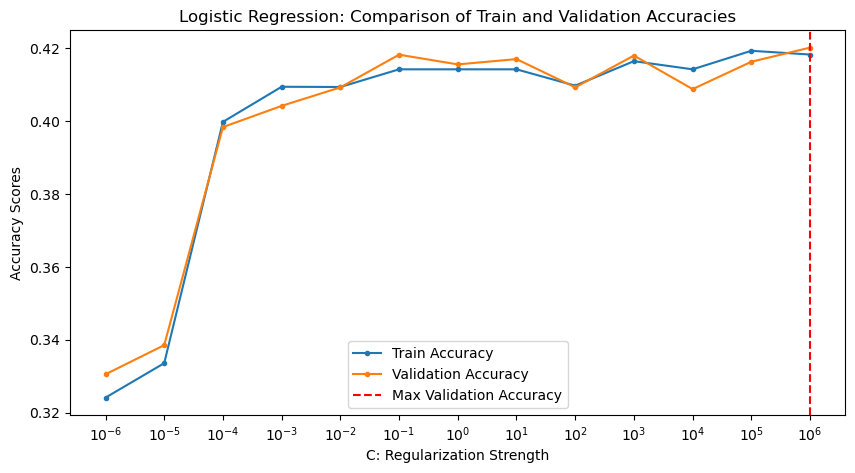

In [214]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression: Comparison of Train and Validation Accuracies')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = validation_accuracies.index(max(validation_accuracies))
C_value_val_test = c_values[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=C_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

Lets try the same with scaling the data and see if we can get a better accuracy score:

In [215]:
#instantiate the scaler
scaler = StandardScaler()

#fit scaler to train data
scaler.fit(X_train_full)

#transform train and test dataframes
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_full_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test)


In [235]:
# Let's try a modest range of C values to try and optimize the logreg model:

c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
scaled_train_accuracies = []
scaled_validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    scaled_logreg = LogisticRegression(C=c, random_state=42).fit(X_train_scaled, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    scaled_train_accuracies.append(scaled_logreg.score(X_train_scaled, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    scaled_validation_accuracies.append(scaled_logreg.score(X_val_scaled, y_val))

print(f'Max Training Accuracy: {max(scaled_train_accuracies)}, at C Value: {c_values[scaled_train_accuracies.index(max(scaled_train_accuracies))]}')
print(f'Max Validation Accuracy: {max(scaled_validation_accuracies)}, at C Value: {c_values[scaled_validation_accuracies.index(max(scaled_validation_accuracies))]}')

Max Training Accuracy: 0.44518554450642733, at C Value: 0.1
Max Validation Accuracy: 0.44616876818622697, at C Value: 0.1


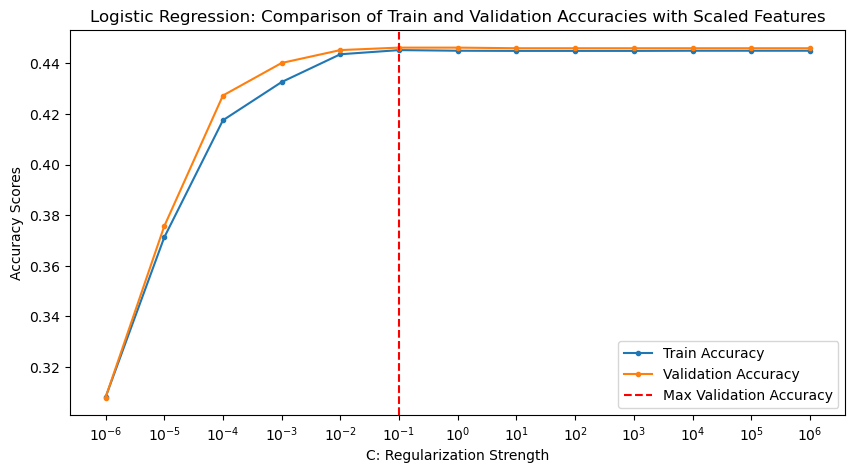

In [236]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, scaled_train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, scaled_validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression: Comparison of Train and Validation Accuracies with Scaled Features')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = scaled_validation_accuracies.index(max(scaled_validation_accuracies))
C_value_max_val = c_values[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=C_value_max_val, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

Lets try a different regularization penalty (l1 = lasso) and different solver (saga) for the scaled data

In [239]:
# Let's try a modest range of C values to try and optimize the logreg model:

c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=c, solver='saga', penalty = 'l1', random_state=42).fit(X_train_scaled, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train_scaled, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_val_scaled, y_val))

print(f'Max Training Accuracy: {max(train_accuracies)}, at C Value: {c_values[train_accuracies.index(max(train_accuracies))]}')
print(f'Max Validation Accuracy: {max(validation_accuracies)}, at C Value: {c_values[validation_accuracies.index(max(validation_accuracies))]}')

Max Training Accuracy: 0.44518554450642733, at C Value: 0.1
Max Validation Accuracy: 0.4466537342386033, at C Value: 0.1


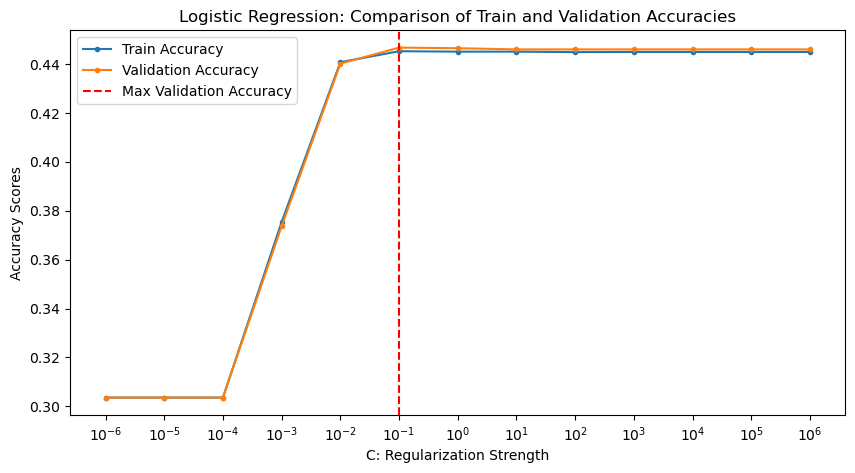

In [240]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression: Comparison of Train and Validation Accuracies')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = validation_accuracies.index(max(validation_accuracies))
C_value_val_test = c_values[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=C_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

In [220]:
#todo: fit best param C on log regression: Train full and test:

### KNN

In [221]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = range(1, X_train_scaled.shape[1], 2)

train_acc = []
val_acc = []

for n in neighbors: 
    
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train_scaled, y_train)
    
    #Score the model on the test set
    train_accuracy = KNN_model.score(X_train_scaled, y_train)
    val_accuracy = KNN_model.score(X_val_scaled, y_val)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

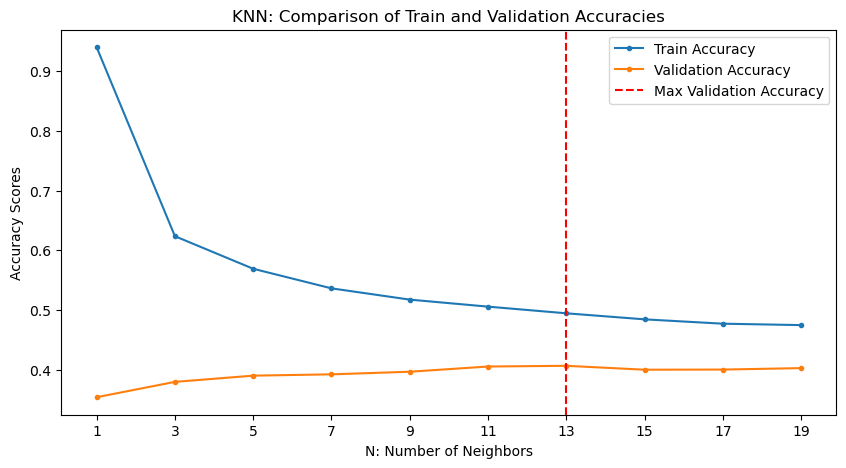

In [222]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(neighbors, train_acc,label="Train Accuracy",marker='.')
plt.plot(neighbors, val_acc,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('KNN: Comparison of Train and Validation Accuracies')
plt.xlabel('N: Number of Neighbors')
plt.xticks(neighbors)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = val_acc.index(max(val_acc))
n_value_val_test = neighbors[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=n_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

In [223]:
#todo: fit best param neighbors on log regression: Train full and test:

### See `Modelling and Feature Engineering` notebook for most upto date version this was an iteration that I will not be using for now